**Modelo de presa predador Lotka-Volterra**

---



El modelo de Lotka-Volterra describe la dinámica de interacción de dos poblaciones, y esta dado por

$$ u_t =   au - buv + D_1 u_{xx}, $$
$$ v_t = - cv + duv + D_2 v_{xx}. $$

En estas ecuaciones $u(x,t)$ es la densidad de presas, $v(x,t)$ la de predadores, $a$ la tasa de nacimiento de presas, $c$ la tasa de muerte de predadores, $b$ y $d$ son los acoplamientos entre especies, y $D_1$ y $D_2$ sus difusividades.


**Modelo para la propagación del fuego, ecuación de Kuramoto-Sivashinsky**

---




La ecuación de Kuramoto-Sivashinsky viene dada por

$$ u_t = -u_{xx} -u_{xxxx} - (u_x)^2/2 $$

Derivando respecto a x y tomando $v = u_x$ se tiene

$$ v_t = -v_{xx} -v_{xxxx} - vv_x, $$

de donde puede verse que el término $v_{xx}$ representa la reacción, que $v_{xxxx}$ es el término de disipación y $vv_x$ es el término advectivo.


Predador Presa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def evol(u,v, k,D_1, D_2, a, b, c, d,N,dt):
    # Evoluciona en el tiempo la PDE usando el método pseudoespectral y Runge-Kutta de segundo orden
    f  = np.fft.rfft(u)     #vaya al espacio de Fourier
    ft = f

    g = np.fft.rfft(v)
    gt = g
    for ord in [2,1]:       # Bucle para el Runge-Kutta
        D   = dt/ord                 #D está siendo iterado entre D = {dt/2, dt/1}
        fuxx = f*D_1*((1j*k)**2)        #derivada de la advección en x, baja el argumento de la exponencial
        fev = a * f + fuxx + b * compute_advection(f, g, k, N)  #evolución con euler
        f = ft + D * fev
        f[int(N/3):] = 0    # Dealiasing (eliminemos modos espúreos!)

        gvxx = g*D_2*((1j*k)**2)        #derivada de la advección en x, baja el argumento de la exponencial
        gev = (-1) *c * g + gvxx + d * compute_advection(f, g, k, N)     #evolución con euler
        g = gt + D * gev
        g[int(N/3):] = 0    # Dealiasing (eliminemos modos espúreos!)

    out_presas = np.fft.irfft(f)  #Vuelva del espacio de Fourier
    out_predadores = np.fft.irfft(g)  #Vuelva del espacio de Fourier
    return out_presas, out_predadores

def compute_advection(f, g, k,N):
    u   =  np.fft.irfft(f)            # vuelva para poder multiplicar!
    v  =  np.fft.irfft(g)                       # eso de arriba.
    p   = v*u
    out = np.fft.rfft(p)
    return out

def lotka_volterra(u, v, D_1, D_2, a, b, c, d, dx, dt, N, step, k, G):
    G= G
    global out_predadores
    global out_presas

    out_presas = np.zeros((N,step))
    out_presas[:,0] = u

    out_predadores = np.zeros((N,step))
    out_predadores[:,0] = v


    for i in np.arange(step-1): # Evolución temporal
      out_presas[:,i+1], out_predadores[:,i+1] = evol(out_presas[:,i],out_predadores[:,i], k,D_1, D_2, a, b, c, d,N,dt)


    img = plt.imshow(out_presas, aspect="auto", cmap='cool')
    plt.xticks(ticks=np.arange(0, len(out_presas[0]), 100000), labels=np.arange(0, len(out_presas[0]), 100000) / 100000)
    plt.colorbar(img, label='Valor')
    plt.xlabel("Presas en el tiempo")
    plt.ylabel("Presas en el espacio")
    plt.show()

    img = plt.imshow(out_predadores, aspect="auto", cmap='hot')
    plt.xticks(ticks=np.arange(0, len(out_predadores[0]), 100000), labels=np.arange(0, len(out_predadores[0]), 100000) / 100000)
    plt.colorbar(img, label='Valor')
    plt.xlabel("Predadores en el tiempo")
    plt.ylabel("Predadores en el espacio")
    plt.show()

    if G == 1:
      for i in range(step-1):
        plt.plot(x, out_presas[:,i])
        plt.plot(x, out_predadores[:,i])
        plt.grid(linestyle='--')
      plt.show()

Voy a partir de estas condiciones y parámetros. Fueron seleccionados debido a que dejan mostrar el funcionamiento del modelo al no ser condiciones iniciales simples y periódicas. \\
Por otro lado, los parámetros son los siguientes sólo teniendo en cuenta que el término difusivo no sea el dominante. Los demás parámetros fueron seleccionados debido a su orden.

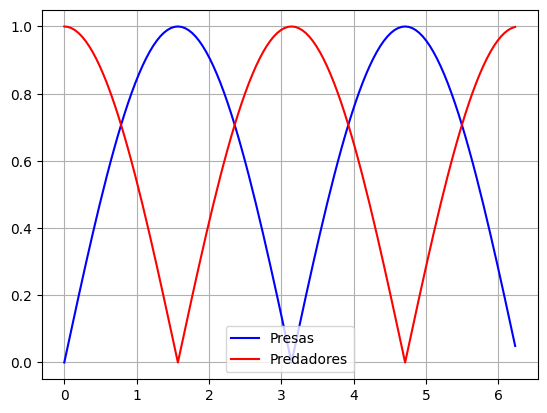

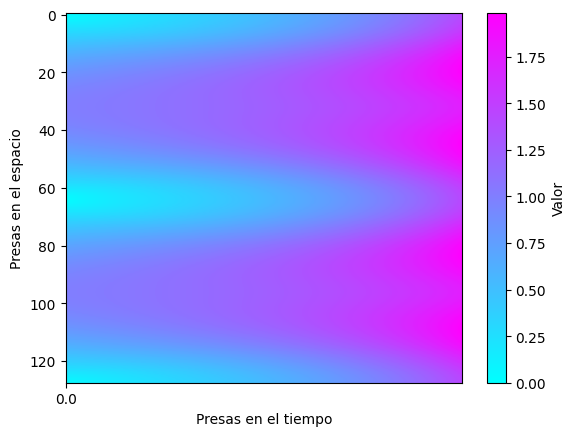

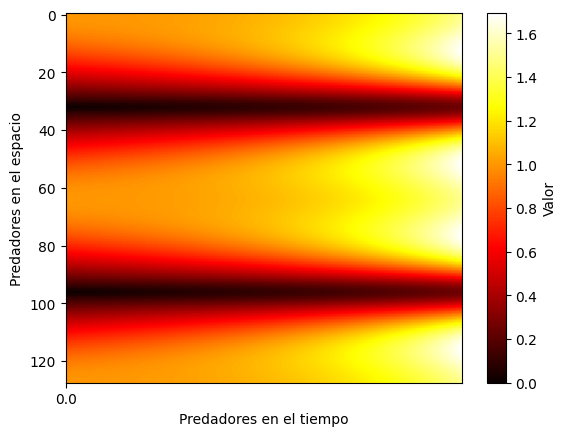

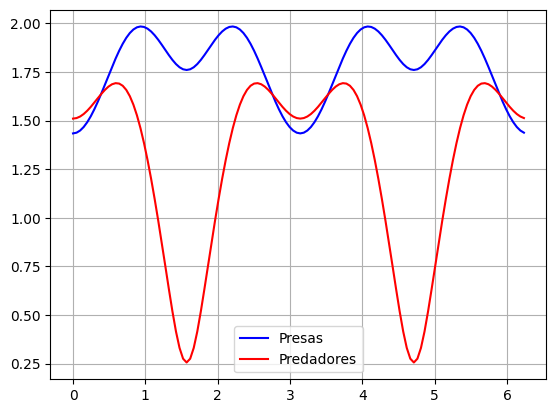

In [ ]:
a = 0.1 #tasa de nacimiento de presas

b=.2 #acoplamiento para presas
c=.02 #tasa de muerte de predador
d=.2 #acoplamiento para predador

D_1 = .04 #movilidad de mi onda/viscosidad del medio
D_2 = .002


N = 128
dt = 1e-3
t_f = 4



step = int(t_f / dt) #los puntos
x = np.linspace(0,2*np.pi,N,endpoint=False) # Coordenada espacial en [0,2*pi)
dx = x[1] - x[0]
t = np.arange(step)*dt                      # Tiempo
k = np.arange(0,N/2+1)

u = abs(np.sin(x)) #presa
v = abs(np.cos(x)) #predador

#grafico mis poblaciones a tiempo inicial

plt.plot(x, u, c="blue", label="Presas")
plt.plot(x, v, c="red", label="Predadores")
plt.legend()
plt.grid()
plt.show()



lotka_volterra(u, v, D_1, D_2, a, b, c, d, dx, dt, N, step, k, 0)

plt.plot(x, out_presas[:,-1], c="blue", label="Presas")
plt.plot(x, out_predadores[:,-1], c="red", label="Predadores")
plt.legend()
plt.grid()
plt.show()

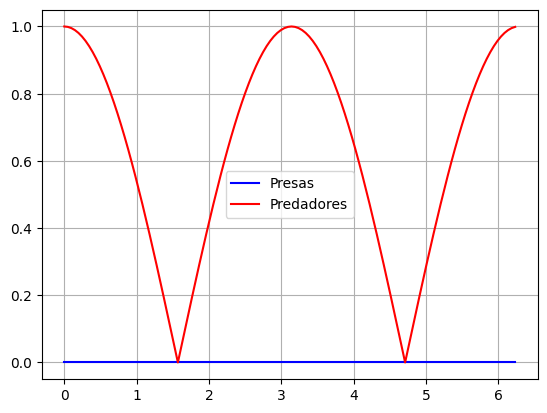

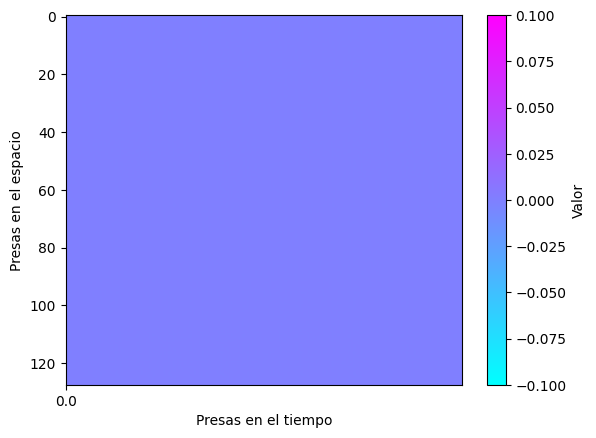

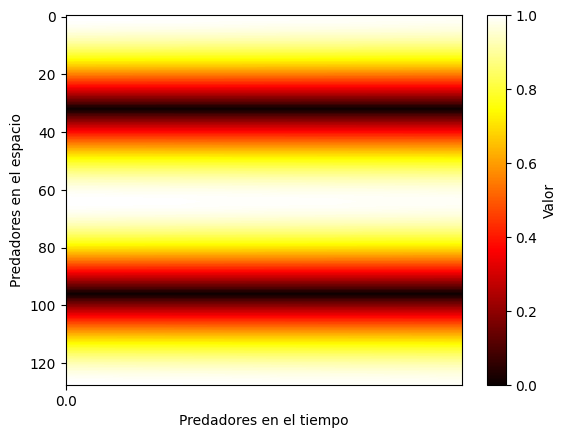

In [ ]:
a = 0.1 #tasa de nacimiento de presas

b=.4 #acoplamiento para presas
c=.005 #tasa de muerte de predador
d=.4 #acoplamiento para predador

D_1 = .04 #movilidad de mi onda/viscosidad del medio, NO TIENE QUE SER DOMINANTE
D_2 = .000003


N = 128
dt = 1e-3
t_f = 2



step = int(t_f / dt) #los puntos
x = np.linspace(0,2*np.pi,N,endpoint=False) # Coordenada espacial en [0,2*pi)
dx = x[1] - x[0]
t = np.arange(step)*dt                      # Tiempo
k = np.arange(0,N/2+1)

u = abs(x*0) #presa
v = abs(np.cos(x)) #predador

#grafico mis poblaciones a tiempo inicial

plt.plot(x, u, c="blue", label="Presas")
plt.plot(x, v, c="red", label="Predadores")
plt.legend()
plt.grid()
plt.show()



lotka_volterra(u, v, D_1, D_2, a, b, c, d, dx, dt, N, step, k, 0)